### Loading Data (load_data function):

Purpose: To load the dataset from a CSV file into a pandas DataFrame.
Reason: This step is essential to begin working with the dataset stored in a structured format.

### Select Significant Columns (select_significant_columns function):

Purpose: Select columns identified as significant, often based on domain knowledge or statistical tests like ANOVA.
Reason: Focuses analysis on relevant features that are likely to influence the target variable, reducing computational overhead and noise.

### Check Missing Values (check_missing_values function):

Purpose: Identify columns with missing data.
Reason: Missing data can affect the performance of machine learning models and must be addressed through imputation or removal.

### Outlier Detection (outlier_detection function):

Purpose: Identify and summarize outliers in numerical columns.
Reason: Outliers can distort statistical analyses and model training, so identifying and possibly correcting them is crucial.

### Winsorization (winsorize_data function):

Purpose: Limit extreme values in specified columns to mitigate the impact of outliers.
Reason: Helps in stabilizing variance and improving model performance by handling extreme values more effectively.

### Remove Columns with High Zero Proportion (remove_columns_with_high_zero_proportion function):

Purpose: Remove columns where a high proportion of values are zeros.
Reason: Such columns often do not provide useful information for modeling and can be a source of noise.

### Skewness Correction (calculate_skewness and remove_highly_skewed_columns functions):

Purpose: Identify and correct skewness in numerical columns.
Reason: Skewed data can violate assumptions of statistical models, so correcting skewness helps improve model accuracy.

### Remove Low Variance Columns (remove_low_variance_columns function):

Purpose: Remove columns with low variance.
Reason: Low variance columns typically do not contribute significantly to model learning, so removing them simplifies the dataset without losing relevant information.

### Remove Highly Correlated Columns (remove_highly_correlated_columns function):

Purpose: Remove columns that are highly correlated with each other.
Reason: Highly correlated features can lead to multicollinearity issues in models, affecting their interpretability and stability.

### Feature Selection (select_important_features function):

Purpose: Select features that are most important for predicting the target variable.
Reason: Focuses model training on the most predictive features, enhancing model performance and reducing overfitting.

### Data Visualization (plot_histograms and plot_qq_plots functions):

Purpose: Visualize data distributions and check for normality.
Reason: Provides insights into the distribution of data and helps assess if data meets assumptions required by certain models.

### Normality Tests (perform_normality_tests function):

Purpose: Assess the normality of data distributions.
Reason: Important for selecting appropriate statistical tests and models that assume normality in data.

### Data Splitting (split_data_by_target function):

Purpose: Split the dataset into training and test sets, balancing classes based on the target variable.
Reason: Ensures that both training and test sets have representative samples from each class, crucial for evaluating model performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mstats, shapiro, kstest, anderson, probplot
from sklearn.preprocessing import StandardScaler

In [2]:
def load_data(filepath):
    """
    Load data from a CSV file.

    Parameters:
    filepath (str): Path to the CSV file.

    Returns:
    pd.DataFrame: Loaded data as a pandas DataFrame.
    """
    return pd.read_csv(filepath)

In [3]:
def select_significant_columns(df, columns):
    """
    Select significant columns from the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of significant columns to select.

    Returns:
    pd.DataFrame: DataFrame with selected significant columns.
    """
    return df[columns]

In [4]:
def check_missing_values(df):
    """
    Check for missing values in the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    np.ndarray: Array of missing value counts for each column.
    """
    return df.isna().sum().values

In [5]:
def outlier_detection(df):
    """
    Detect and summarize outliers in numerical columns of the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_summary = {}

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_summary[column] = outlier_count

    print("Outlier Summary:")
    for column, count in outlier_summary.items():
        print(f"{column}: {count} outliers")
    print("\n")

In [6]:
def winsorize_data(df, columns, limits=[0.05, 0.05]):
    """
    Apply Winsorization to limit extreme values in specified columns.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of columns to Winsorize.
    limits (list): Limits for Winsorization.

    Returns:
    pd.DataFrame: DataFrame with Winsorized columns.
    """
    for col in columns:
        df[col] = mstats.winsorize(df[col], limits=limits)
    return df

In [7]:
def remove_columns_with_high_zero_proportion(df, threshold=0.5):
    """
    Remove columns with a high proportion of zero values.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    threshold (float): Proportion threshold to remove columns.

    Returns:
    pd.DataFrame: DataFrame with specified columns removed.
    """
    zero_proportions = (df == 0).mean()
    cols_to_remove = zero_proportions[zero_proportions > threshold].index.tolist()
    print(f"Removing columns with more than {threshold * 100}% zero values:")
    print(cols_to_remove)
    return df.drop(columns=cols_to_remove)

In [8]:
def calculate_skewness(df):
    """
    Calculate skewness of numerical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    pd.Series: Series with skewness values for each numerical column.
    """
    return df.skew(numeric_only=True)

In [9]:
def identify_highly_skewed_columns(skewness, threshold=1.0):
    """
    Identify columns with skewness above the specified threshold.

    Parameters:
    skewness (pd.Series): Series with skewness values for each numerical column.
    threshold (float): Skewness threshold to consider a column highly skewed.

    Returns:
    list: List of column names that are highly skewed.
    """
    return skewness[abs(skewness) > threshold].index.tolist()


In [10]:
def remove_highly_skewed_columns(df, skewness, threshold=1.0):
    """
    Remove columns with skewness above the specified threshold.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    skewness (pd.Series): Series with skewness values for each numerical column.
    threshold (float): Skewness threshold to consider a column highly skewed.

    Returns:
    pd.DataFrame: DataFrame with specified columns removed.
    """
    highly_skewed_cols = identify_highly_skewed_columns(skewness, threshold)
    print(f"Removing highly skewed columns: {highly_skewed_cols}")
    return df.drop(columns=highly_skewed_cols)

In [11]:
def remove_low_variance_columns(data, threshold=0.01):
    """
    Remove columns with low variance.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    threshold (float): Variance threshold to remove columns.

    Returns:
    pd.DataFrame: DataFrame with low variance columns removed.
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    retained_columns = data.columns[selector.get_support()]
    return data[retained_columns]


In [12]:
def remove_highly_correlated_columns(data, threshold=0.9):
    """
    Remove highly correlated columns from the DataFrame.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    threshold (float): Correlation threshold to remove columns.

    Returns:
    pd.DataFrame: DataFrame with highly correlated columns removed.
    """
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(columns=to_drop)

In [13]:
def select_important_features(data, target, num_features=10):
    """
    Select important features using a RandomForestClassifier.

    Parameters:
    data (pd.DataFrame): Input DataFrame with features.
    target (pd.Series): Target variable.
    num_features (int): Number of important features to select.

    Returns:
    pd.DataFrame: DataFrame with selected important features.
    """
    model = RandomForestClassifier()
    model.fit(data, target)
    feature_importances = pd.Series(model.feature_importances_, index=data.columns)
    selected_features = feature_importances.nlargest(num_features).index
    return data[selected_features]

In [14]:
def plot_histograms(df):
    """
    Plot histograms for the columns of the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    """
    for column in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()

def plot_qq_plots(df):
    """
    Plot Q-Q plots for the  columns of the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    """
    for column in df.columns:
        plt.figure(figsize=(10, 5))
        probplot(df[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column}')
        plt.show()


In [15]:
def perform_normality_tests(df):
    """
    Perform normality tests (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) on the first 8 columns of the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    """
    for column in df.columns:
        stat, p = shapiro(df[column])
        print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p={p}')
        
        result = anderson(df[column])
        print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}, Critical Values={result.critical_values}')

        stat, p = kstest(df[column], 'norm', args=(df[column].mean(), df[column].std()))
        print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p={p}')


In [16]:
def split_data_by_target(df):
    """
    Split the dataset into train and test sets with equal lengths based on the classes in the target column.

    Parameters:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    tuple: Training and test sets for features (X) and target (y).
    """
    class_0_index = list(df[df['target'] == 0].index)
    train_class_zero = class_0_index[:len(class_0_index)//2]
    test_class_zero = class_0_index[len(class_0_index)//2:]

    class_1_index = list(df[df['target'] == 1].index)
    train_class_1 = class_1_index[:len(class_1_index)//2]
    test_class_1 = class_1_index[len(class_1_index)//2:]

    class_2_index = list(df[df['target'] == 2].index)
    train_class_2 = class_2_index[:len(class_2_index)//2]
    test_class_2 = class_2_index[len(class_2_index)//2:]

    class_3_index = list(df[df['target'] == 3].index)
    train_class_3 = class_3_index[:len(class_3_index)//2]
    test_class_3 = class_3_index[len(class_3_index)//2:]

    class_4_index = list(df[df['target'] == 4].index)
    train_class_4 = class_4_index[:len(class_4_index)//2]
    test_class_4 = class_4_index[len(class_4_index)//2:]

    train_set = pd.concat([df.loc[train_class_zero], df.loc[train_class_1], df.loc[train_class_2], df.loc[train_class_3], df.loc[train_class_4]])
    test_set = pd.concat([df.loc[test_class_zero], df.loc[test_class_1], df.loc[test_class_2], df.loc[test_class_3], df.loc[test_class_4]])

    X_train = train_set.drop(columns=['target'])
    y_train = train_set['target']
    X_test = test_set.drop(columns=['target'])
    y_test = test_set['target']

    return X_train, y_train, X_test, y_test

In [17]:
print("\n\n")

In [20]:
def main():
    """
    Main function to orchestrate the data processing workflow.
    """
    filepath = r"C:\Users\E009819\Downloads\2021\Modeling_data.csv"
    #significant columns from ANova test
    significant_columns = ['56', '9', '64', '25', '133', '47', '73', '100', '108', '98', '0', '137', '55', '128', '50', '11', '18', '90', '125', '109', '112', '146', '15', '23', '4', '92', '102', '35', '12', '117', '58', '79', '37', '54', '85', '8', '119', '87', '142', '5', '34', '2', '1', '32', '150', '122', '124', '66', '120', '20', '140', '82', '59', '60', '48', '95', '44', '76', '134', '149', '39', '145', '110', '144', '7', '62', '94', '43', '127', '118']
    
    data = load_data(filepath)
    significant_data = select_significant_columns(data, significant_columns)
    print("\n\n\nChecking for missing values:")
    print(check_missing_values(significant_data))

    print("\n\n\nOutlier Detection:")
    outlier_detection(significant_data)

    # Winsorize data
    significant_data = winsorize_data(significant_data, significant_columns)
    
    # Remove columns with high zero proportion
    un_sparsed_data = remove_columns_with_high_zero_proportion(significant_data, threshold=0.90)
    
    # Calculate skewness and remove highly skewed columns
    skewness = calculate_skewness(un_sparsed_data)
    print("\n\n\nSkewness of numerical columns:\n", skewness)
    data_cleaned = remove_highly_skewed_columns(un_sparsed_data, skewness, threshold=1.0)

    # Remove low variance and highly correlated columns
    data_reduced = remove_low_variance_columns(data_cleaned)
    print(f"\n\n\nColumns after removing low variance features: {data_reduced.shape[1]}")
    data_reduced = remove_highly_correlated_columns(data_reduced)
    print(f"\n\n\nColumns after removing highly correlated features: {data_reduced.shape[1]}")

    # Feature selection
    data_reduced['target'] = data['target']
    X = data_reduced.drop(columns=['target'])
    y = data_reduced['target']
    data_reduced = select_important_features(X, y, num_features=10)
    print(f"\n\n\nColumns after selecting important features: {data_reduced.shape[1]}")
    data_reduced['target'] = y

    # Plot histograms and Q-Q plots
    final_df = data_reduced.copy(deep=True)
    plot_histograms(final_df[final_df.columns[:10]])
    plot_qq_plots(final_df[final_df.columns[:10]])

    # Perform normality tests
    perform_normality_tests(final_df[final_df.columns[:10]])
    
    # Split data into train and test sets
    X_train, y_train, X_test, y_test = split_data_by_target(final_df)
    print("\n\n\nTraining and test sets created.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    X_train.to_csv('X_train.csv', index=False)
    y_train.to_csv('y_train.csv', index=False)
    X_test.to_csv('X_test.csv', index=False)
    y_test.to_csv('y_test.csv', index=False)




Checking for missing values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



Outlier Detection:
Outlier Summary:
56: 179 outliers
9: 150 outliers
64: 661 outliers
25: 140 outliers
133: 156 outliers
47: 191 outliers
73: 174 outliers
100: 483 outliers
108: 507 outliers
98: 795 outliers
0: 150 outliers
137: 1019 outliers
55: 1624 outliers
128: 494 outliers
50: 240 outliers
11: 16 outliers
18: 76 outliers
90: 70 outliers
125: 31 outliers
109: 214 outliers
112: 498 outliers
146: 4 outliers
15: 142 outliers
23: 942 outliers
4: 1612 outliers
92: 841 outliers
102: 10 outliers
35: 26 outliers
12: 440 outliers
117: 776 outliers
58: 67 outliers
79: 130 outliers
37: 337 outliers
54: 8 outliers
85: 4 outliers
8: 439 outliers
119: 32 outliers
87: 34 outliers
142: 336 outliers
5: 1262 outliers
34: 1157 outliers
2: 1260 outliers
1: 830 outliers
32: 93 outliers
150: 72 outliers
122: 1017 outliers
124: 1

C:\Users\E009819\AppData\Local\Temp\ipykernel_8040\1433415200.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = mstats.winsorize(df[col], limits=limits)


Removing columns with more than 90.0% zero values:
['64']



Skewness of numerical columns:
 56     0.147490
9      0.138351
25    -0.102134
133   -0.066009
47    -0.164988
         ...   
62     0.009409
94     2.333399
43     1.704754
127    0.617962
118    0.003494
Length: 69, dtype: float64
Removing highly skewed columns: ['98', '137', '55', '23', '4', '92', '5', '34', '2', '1', '122', '124', '95', '44', '39', '110', '94', '43']



Columns after removing low variance features: 32



Columns after removing highly correlated features: 26



Columns after selecting important features: 10


C:\Users\E009819\AppData\Local\Temp\ipykernel_8040\2966361557.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['target'] = y


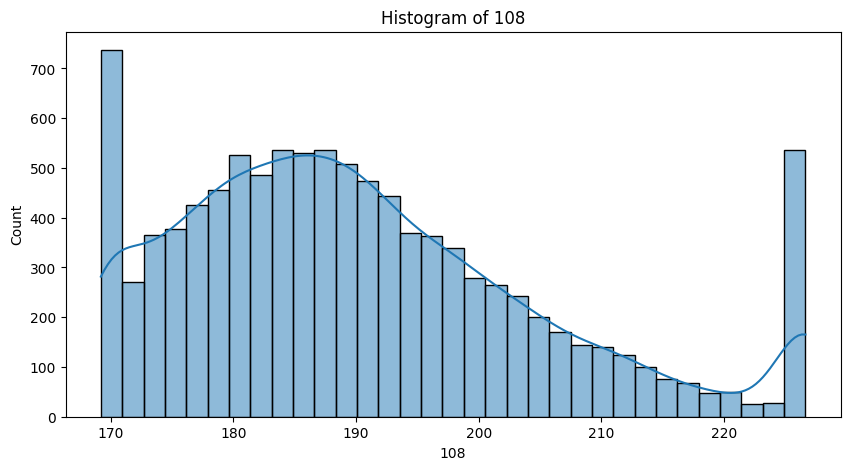

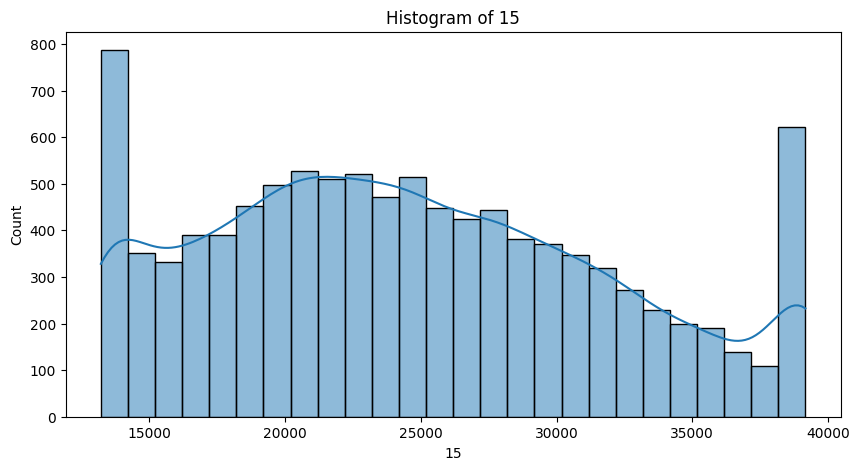

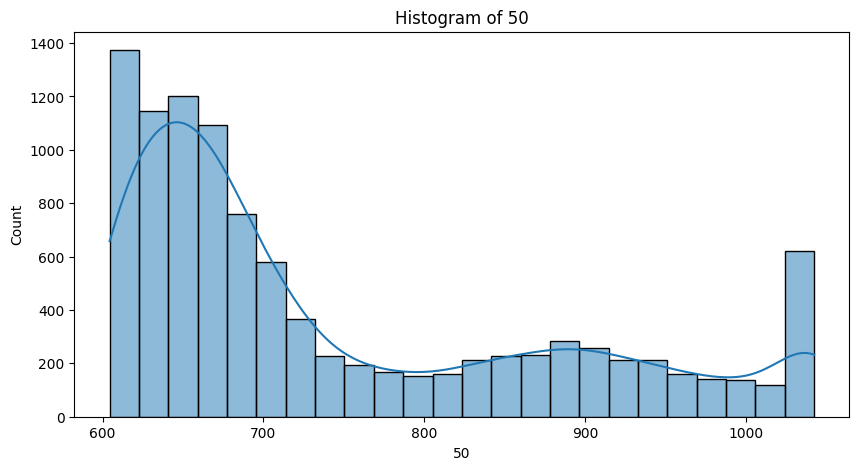

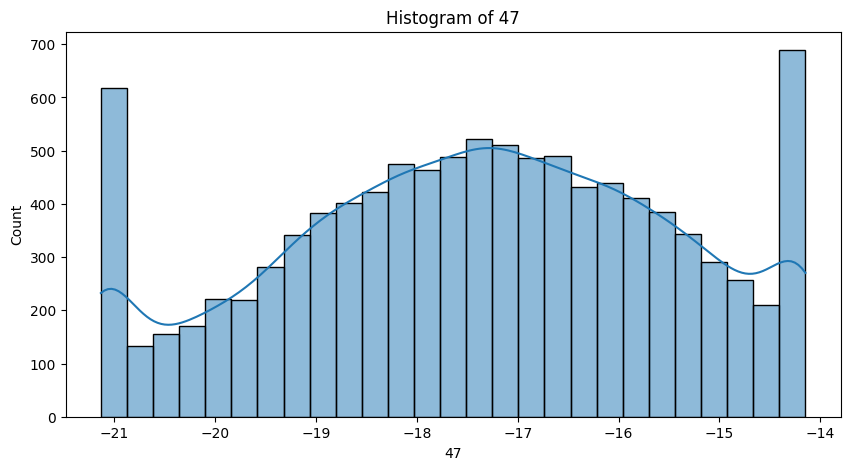

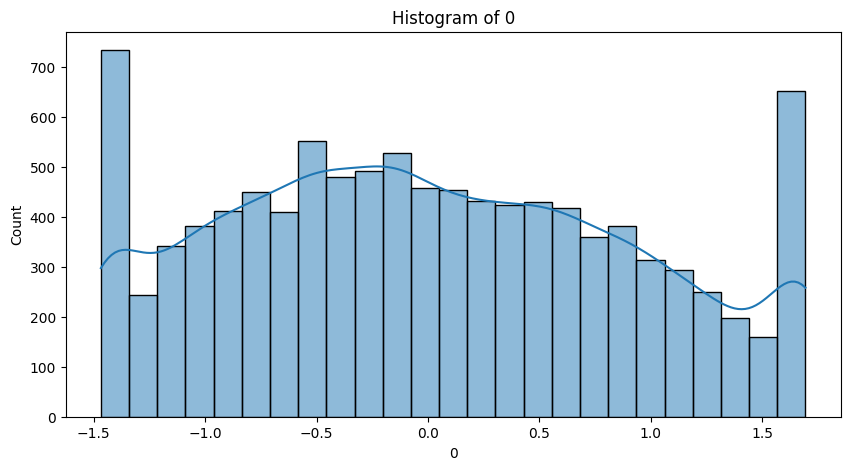

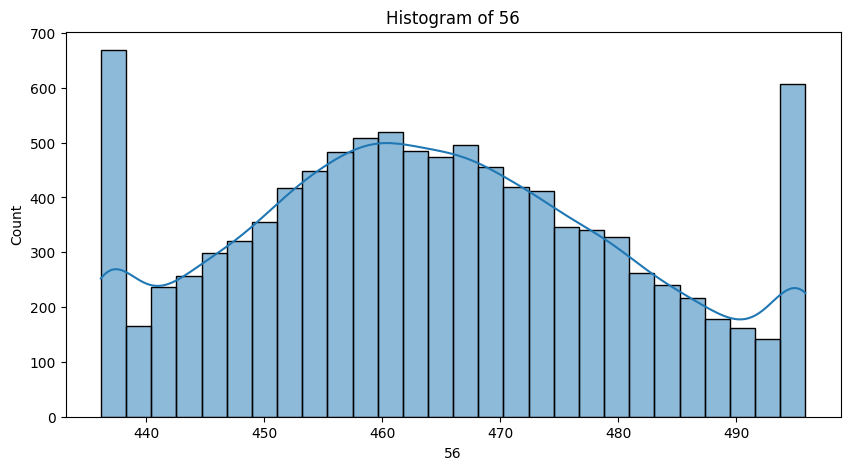

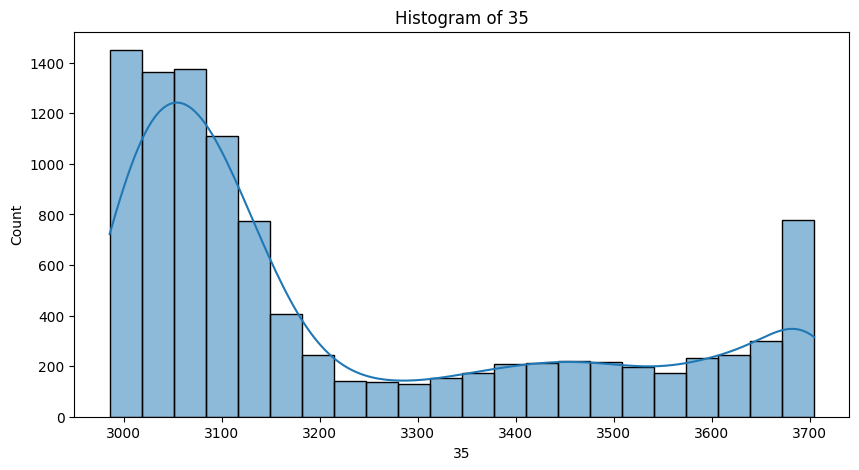

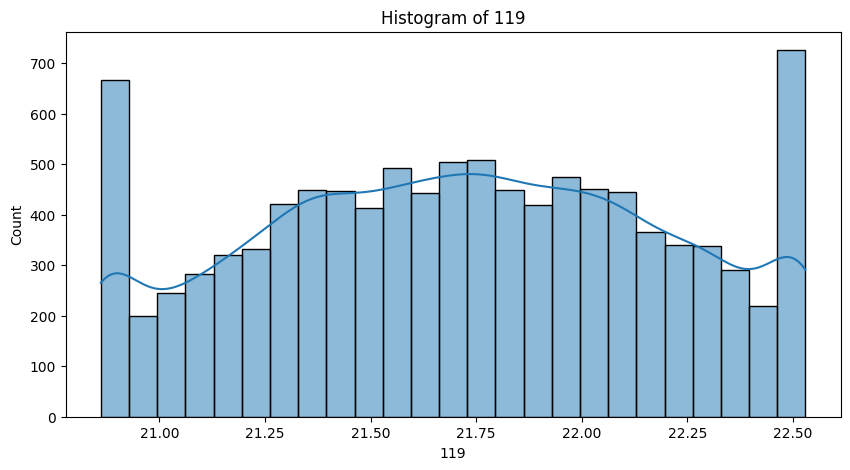

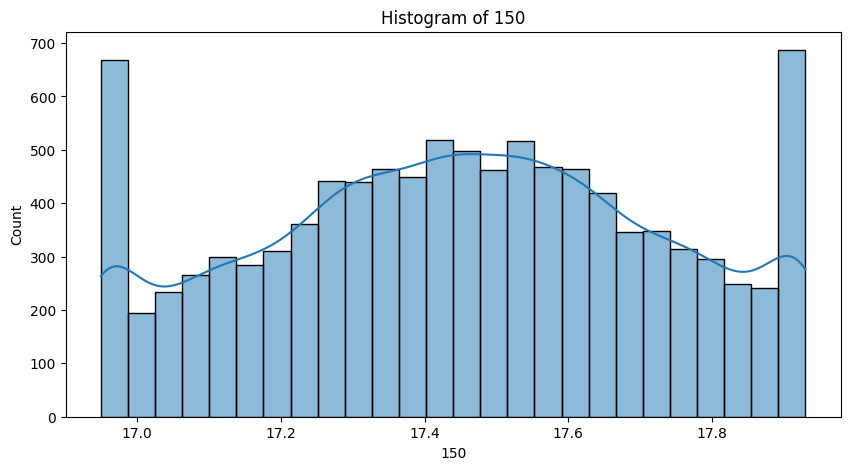

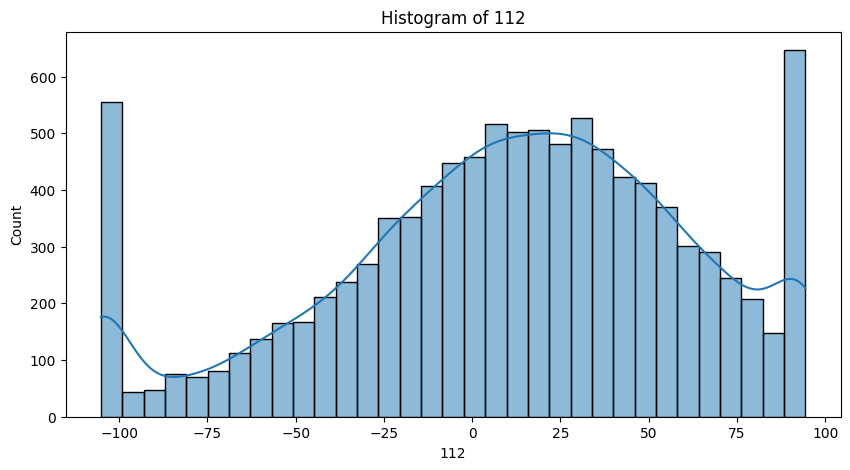

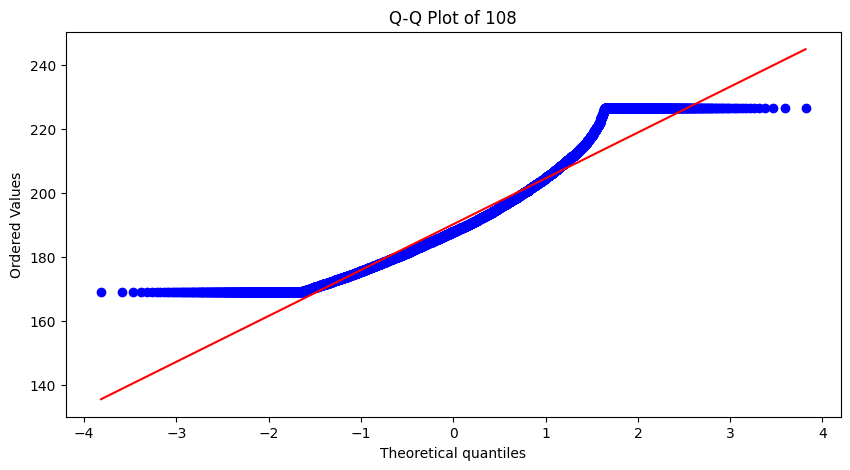

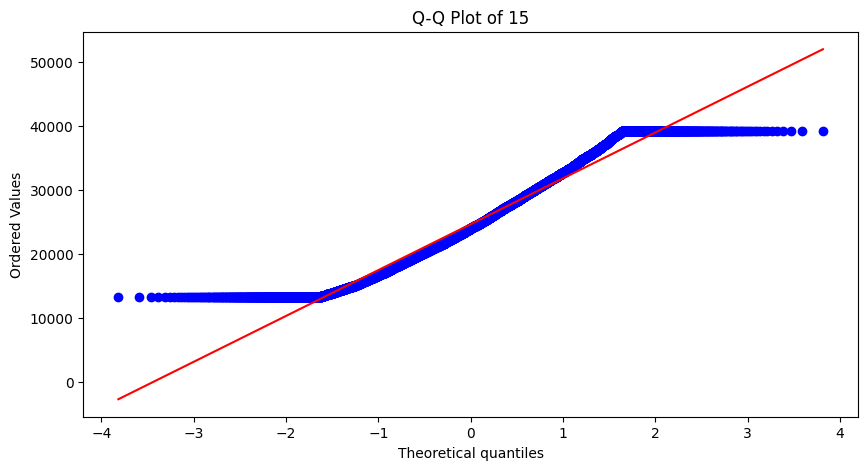

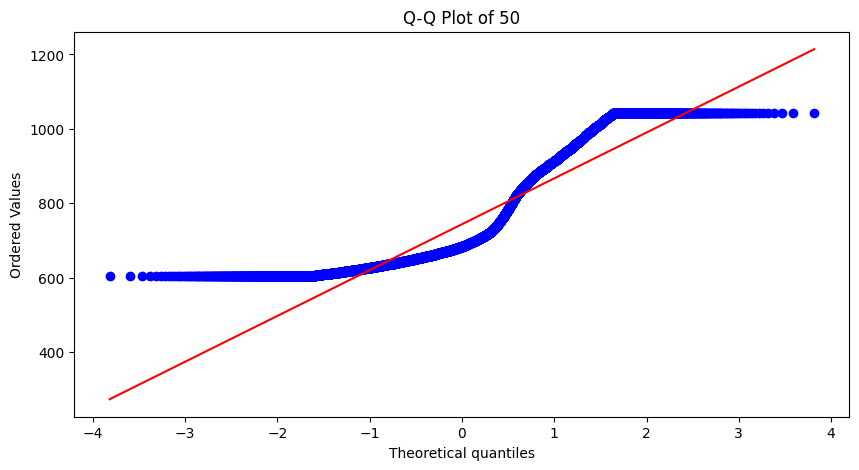

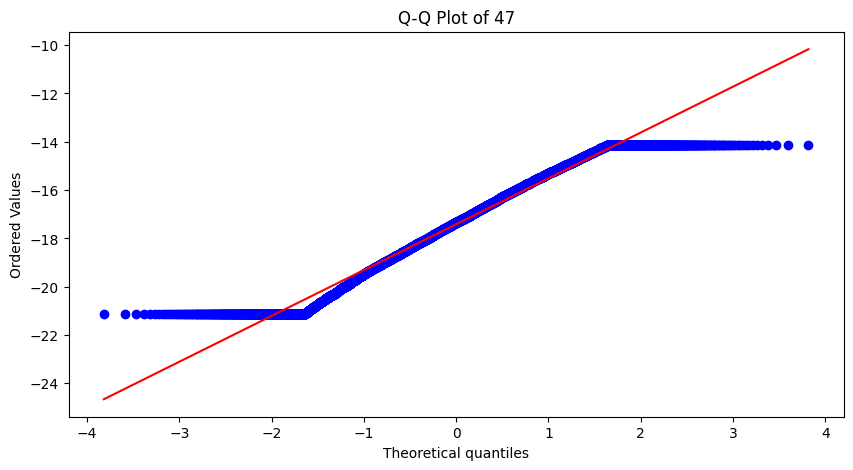

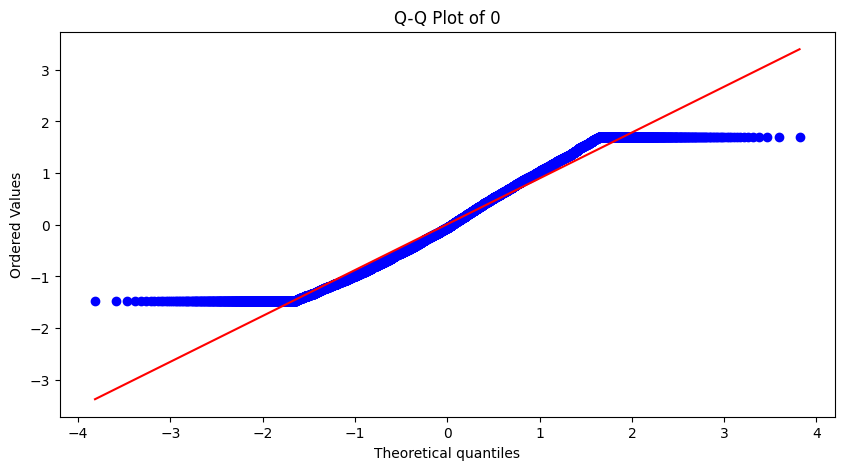

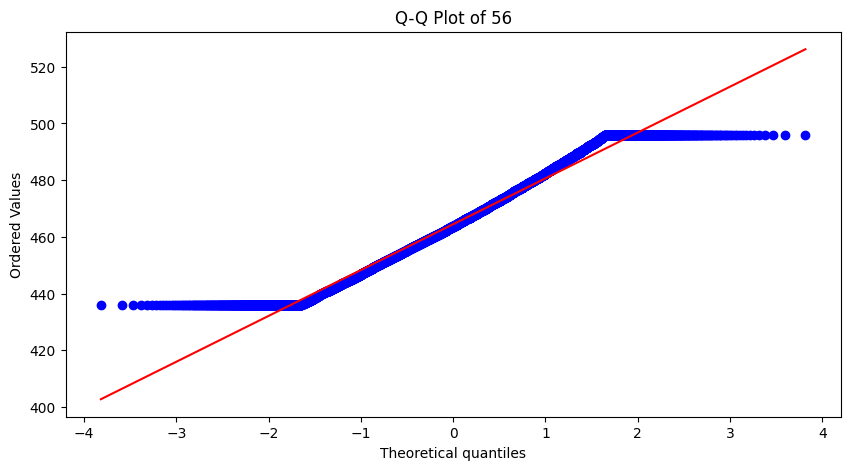

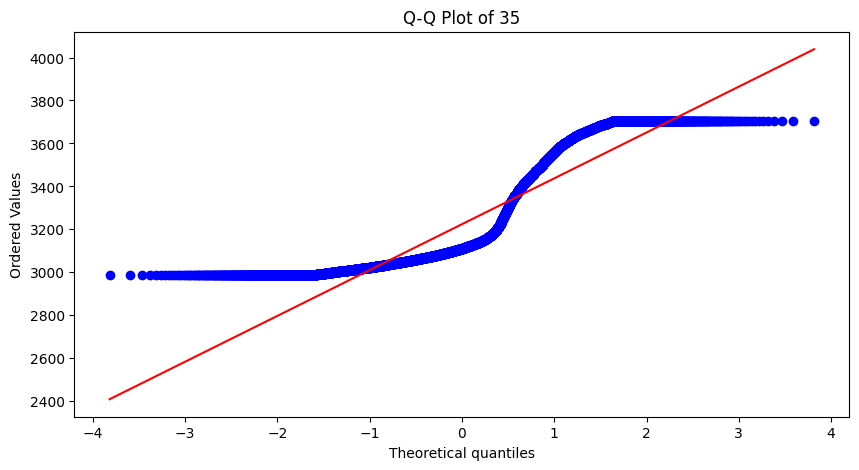

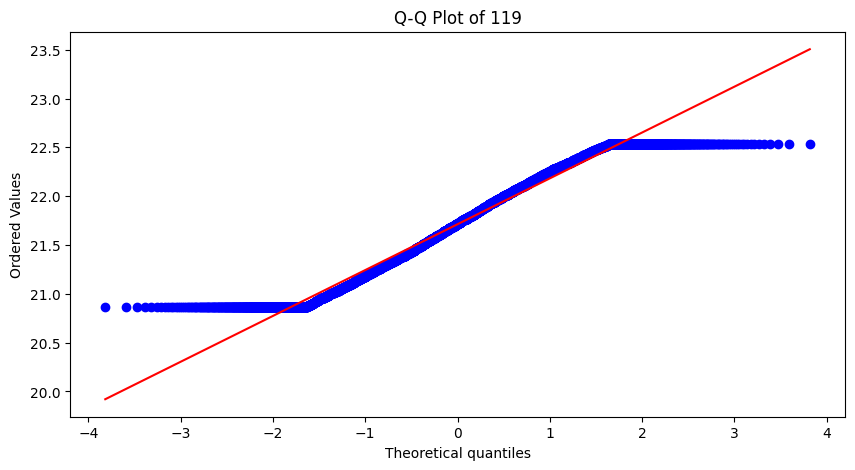

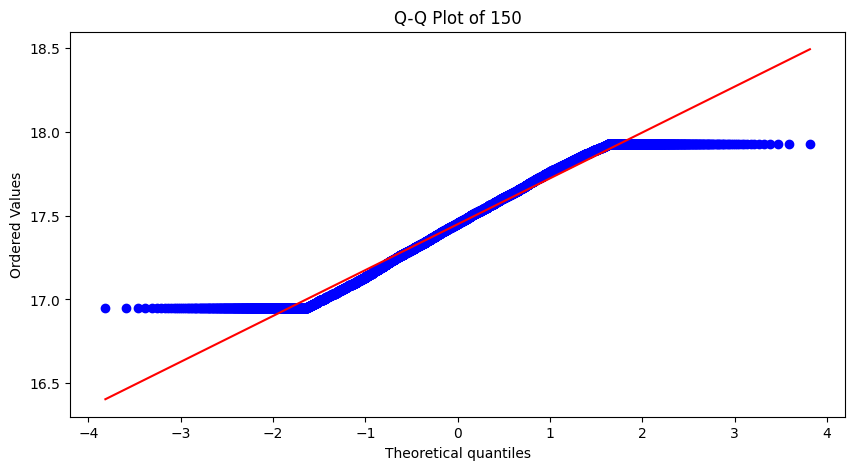

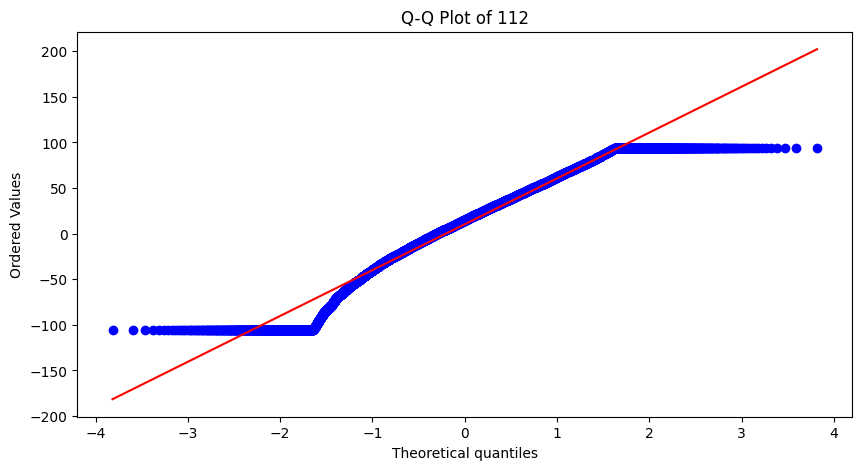

c:\Users\E009819\AppData\Local\miniconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for 108: Statistics=0.9394036531448364, p=0.0
Anderson-Darling Test for 108: Statistic=140.0254229494567, Critical Values=[0.576 0.656 0.787 0.918 1.092]
Kolmogorov-Smirnov Test for 108: Statistics=0.07651373684222189, p=1.368555640088727e-52
Shapiro-Wilk Test for 15: Statistics=0.9635797142982483, p=9.80908925027372e-45
Anderson-Darling Test for 15: Statistic=68.8128302067471, Critical Values=[0.576 0.656 0.787 0.918 1.092]
Kolmogorov-Smirnov Test for 15: Statistics=0.05924239486525032, p=1.098840275136756e-31
Shapiro-Wilk Test for 50: Statistics=0.8427448272705078, p=0.0
Anderson-Darling Test for 50: Statistic=610.1020397231623, Critical Values=[0.576 0.656 0.787 0.918 1.092]
Kolmogorov-Smirnov Test for 50: Statistics=0.19022011661112642, p=0.0
Shapiro-Wilk Test for 47: Statistics=0.9728774428367615, p=4.623836516763312e-40
Anderson-Darling Test for 47: Statistic=39.41428668167828, Critical Values=[0.576 0.656 0.787 0.918 1.092]
Kolmogorov-Smirnov Test for 47: Stati

In [21]:
if __name__ == "__main__":
    main()